ModuleNotFoundError: No module named 'google'

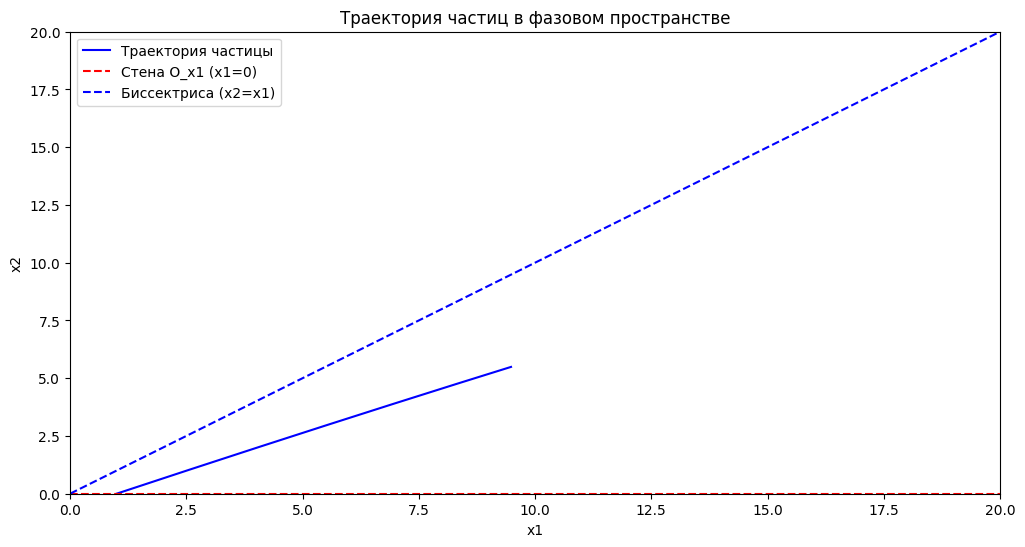

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML
from matplotlib.animation import PillowWriter

# Параметры модели
def hamiltonian(q, p):
    x1, x2 = q
    p1, p2 = p
    return (p1**2 + p2**2) + (x1 + x2)

def equations_of_motion(q, p):
    x1, x2 = q
    p1, p2 = p
    dqdt = [p1, p2]  # dq/dt = p
    dpdt = [-1, -1]  # dp/dt = -∂H/∂q
    return np.array(dqdt), np.array(dpdt)

def apply_boundary_conditions(q, p):
    x1, x2 = q
    if x1 <= 0:  # Жесткая стена на оси O_x1
        q[0] = -x1  # Отражаемся
        p[0] = -p[0]  # Изменяем направление
    if x2 <= 0:  # Жесткая стена
        q[1] = -x2  # Отражаемся
        p[1] = -p[1]  # Изменяем направление
    if x2 >= x1:  # Жесткая стена на биссектрисе
        p[0], p[1] = p[1], p[0]  # Меняем компоненты местами

    return q, p

def runge_kutta_step(q, p, dt):
    dq1, dp1 = equations_of_motion(q, p)
    q1 = q + dq1 * dt / 2
    p1 = p + dp1 * dt / 2

    dq2, dp2 = equations_of_motion(q1, p1)
    q2 = q + dq2 * dt / 2
    p2 = p + dp2 * dt / 2

    dq3, dp3 = equations_of_motion(q2, p2)
    q3 = q + dq3 * dt
    p3 = p + dp3 * dt

    dq4, dp4 = equations_of_motion(q3, p3)

    q_new = q + (dq1 + 2*dq2 + 2*dq3 + dq4) * dt / 6
    p_new = p + (dp1 + 2*dp2 + 2*dp3 + dp4) * dt / 6

    # Применяем условия на границах
    q_new, p_new = apply_boundary_conditions(q_new, p_new)

    return q_new, p_new

# Начальные условия
q_init = np.array([1.0, 0.0])  # Начальные положения (x1, x2)
p_init = np.array([9, 6])  # Начальные импульсы (p1, p2)
dt = 0.01  # Шаг времени
num_steps = 100000  # Количество шагов

# Используем deque для хранения траектории
q_trajectory = deque(maxlen=num_steps)

# Установка начальных условий
q = q_init
p = p_init

# Интеграция по времени
for i in range(num_steps):
    q_trajectory.append(q.copy())
    q, p = runge_kutta_step(q, p, dt)

# Преобразование deque в numpy массив для графиков
q_trajectory = np.array(q_trajectory)

# Построение анимации
fig, ax = plt.subplots(figsize=(12, 6))

# График: Траектория в фазовом пространстве
line, = ax.plot([], [], 'b-', label='Траектория частицы')
# Жесткая стена на оси O_x1
ax.axhline(0, color='red', linestyle='--', label='Стена O_x1 (x1=0)')
# Биссектрисa
ax.axline((0, 0), slope=1, color='blue', linestyle='--', label='Биссектрисa (x2=x1)')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_title('Траектория частиц в фазовом пространстве')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(q_trajectory[:i, 0], q_trajectory[:i, 1])
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=num_steps, interval=1, blit=True)

# Сохранение анимации
ani.save('animation.gif', writer='pillow', fps=30)
